## ADS-507 - Assignment Final Project

## Heat Attack Prediction Analysis


## Team 1

## Team Members
### Kaustav Ghosh Dastidar
### Itzel Cruz
### Subin An

### Importing Libraries

In [212]:
# Importing Libraries

import numpy as np
import pandas as pd
import pymysql as mysql
import matplotlib.pyplot as plt

In [213]:
import warnings
warnings.filterwarnings('ignore')

In [214]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from prettytable import PrettyTable
import seaborn as sns
import os

### Connecting Database

In [215]:
conn=mysql.connect(host='ads507-team1.mysql.database.azure.com',port=int(3306),user='usdads507team1',passwd='Ads507team1$$',db='usdads507team1proj')

### Display Tables

In [216]:
tableNames = pd.read_sql("""SHOW TABLES""", conn)
tableNames

,Tables_in_usdads507team1proj
0,backup_table_heart
1,heart
2,heart_failure_clinical


### Part 1: Accessing The Data

In [217]:

try:
    query = """
    Select 	h.cp,
		h.trtbps,
        h.chol,
        h.thalachh,
        h.age,
        h.fbs,
        h.restecg,
        h.thalachh,
        h.exng,
        h.oldpeak,
        h.slp,
        h.age,
        h.caa,
        h.thall,
        h.sex,
        h.output,
        hfc.anaemia,
        hfc.serum_sodium,
        hfc.creatinine_phosphokinase,
        hfc.diabetes,
        hfc.ejection_fraction,
        hfc.high_blood_pressure,
        hfc.platelets,
        hfc.serum_creatinine,
        hfc.smoking,
        hfc.time as "Time",
        hfc.DEATH_EVENT
from usdads507team1proj.heart h
INNER JOIN usdads507team1proj.heart_failure_clinical hfc ON h.my_row_id = hfc.my_row_id;
"""
    df = pd.read_sql(query,conn)
    #conn.close() #close the connection
    display(df)
except Exception as e:
    conn.close()
    print(str(e))

,cp,trtbps,chol,thalachh,age,fbs,restecg,thalachh,exng,oldpeak,...,serum_sodium,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,smoking,Time,DEATH_EVENT
0,3,145,233,150,63,1,0,150,0,2.3,...,130,582,0,20,1,265000.00,1.9,0,4,1
1,2,130,250,187,37,0,1,187,0,3.5,...,136,7861,0,38,0,263358.03,1.1,0,6,1
2,1,130,204,172,41,0,0,172,0,1.4,...,129,146,0,20,0,162000.00,1.3,1,7,1
3,1,120,236,178,56,0,1,178,0,0.8,...,137,111,0,20,0,210000.00,1.9,0,7,1
4,0,120,354,163,57,0,1,163,1,0.6,...,116,160,1,20,0,327000.00,2.7,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0,120,169,144,44,0,1,144,1,2.8,...,143,61,1,38,1,155000.00,1.1,1,270,0
295,0,140,187,144,63,0,0,144,1,4.0,...,139,1820,0,38,0,270000.00,1.2,0,271,0
296,0,124,197,136,63,0,1,136,1,0.0,...,138,2060,1,60,0,742000.00,0.8,0,278,0
297,0,164,176,90,59,1,0,90,0,1.0,...,140,2413,0,38,0,140000.00,1.4,1,280,0


## Performing EDA

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cp                        299 non-null    int64  
 1   trtbps                    299 non-null    int64  
 2   chol                      299 non-null    int64  
 3   thalachh                  299 non-null    int64  
 4   age                       299 non-null    int64  
 5   fbs                       299 non-null    int64  
 6   restecg                   299 non-null    int64  
 7   thalachh                  299 non-null    int64  
 8   exng                      299 non-null    int64  
 9   oldpeak                   299 non-null    float64
 10  slp                       299 non-null    int64  
 11  age                       299 non-null    int64  
 12  caa                       299 non-null    int64  
 13  thall                     299 non-null    int64  
 14  sex       

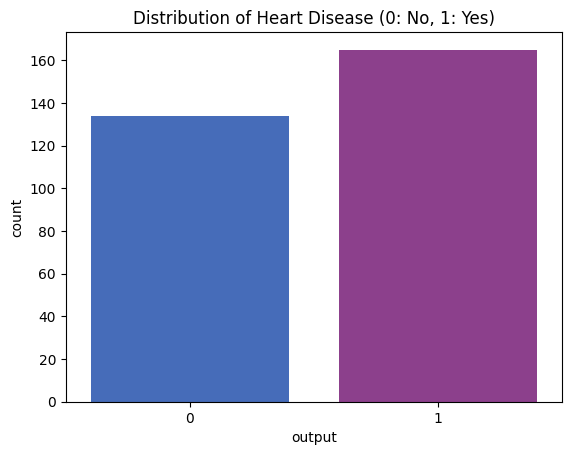

In [219]:
sns.countplot(x='output', data=df, palette=['#3366cc', '#993399'])
plt.title('Distribution of Heart Disease (0: No, 1: Yes)')
plt.show()

## Correlation Matrix

In [220]:
df.corr()

,cp,trtbps,chol,thalachh,age,fbs,restecg,thalachh,exng,oldpeak,...,serum_sodium,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,smoking,Time,DEATH_EVENT
cp,1.000000,0.058305,-0.090981,0.299676,-0.057267,0.105402,0.044914,0.299676,-0.393338,-0.145867,...,-0.027891,0.054482,-0.064800,-0.000045,0.085318,-0.039268,0.107248,-0.033390,-0.418757,0.154846
trtbps,0.058305,1.000000,0.127951,-0.049621,0.274329,0.172362,-0.113584,-0.049621,0.067240,0.191031,...,-0.023791,-0.010377,-0.110085,-0.029000,-0.045822,-0.043354,0.074720,0.078339,0.115071,0.004529
chol,-0.090981,0.127951,1.000000,-0.021212,0.225939,0.018987,-0.145312,-0.021212,0.076752,0.062345,...,-0.009486,-0.013292,-0.007146,-0.110223,-0.070575,-0.020844,0.055614,-0.088797,0.042125,0.041538
thalachh,0.299676,-0.049621,-0.021212,1.000000,-0.403944,-0.007370,0.056303,1.000000,-0.376623,-0.342610,...,-0.053565,0.048171,-0.081020,0.004405,-0.049887,-0.019315,0.017762,0.094053,-0.411082,0.148889
age,-0.057267,0.274329,0.225939,-0.403944,1.000000,0.110571,-0.118887,-0.403944,0.098321,0.203950,...,-0.061957,-0.147012,0.037505,0.026191,-0.033291,0.004476,0.113723,-0.072707,0.185949,-0.114544
fbs,0.105402,0.172362,0.018987,-0.007370,0.110571,1.000000,-0.091692,-0.007370,0.031749,-0.011429,...,-0.065405,0.025935,-0.064974,0.080960,-0.008930,-0.081380,0.055297,0.017651,0.006887,-0.103672
restecg,0.044914,-0.113584,-0.145312,0.056303,-0.118887,-0.091692,1.000000,0.056303,-0.074009,-0.069606,...,-0.069628,0.082679,-0.034007,0.073732,-0.055119,-0.005440,0.012577,-0.100987,-0.040246,-0.005562
thalachh,0.299676,-0.049621,-0.021212,1.000000,-0.403944,-0.007370,0.056303,1.000000,-0.376623,-0.342610,...,-0.053565,0.048171,-0.081020,0.004405,-0.049887,-0.019315,0.017762,0.094053,-0.411082,0.148889
exng,-0.393338,0.067240,0.076752,-0.376623,0.098321,0.031749,-0.074009,-0.376623,1.000000,0.294656,...,0.062610,-0.034632,0.188225,0.063203,-0.050971,0.028318,-0.053123,-0.083398,0.391216,-0.174963
oldpeak,-0.145867,0.191031,0.062345,-0.342610,0.203950,-0.011429,-0.069606,-0.342610,0.294656,1.000000,...,0.018712,0.020592,-0.070103,-0.009993,0.003137,-0.045432,0.015305,-0.023367,0.316174,-0.051223


## Correlation plot

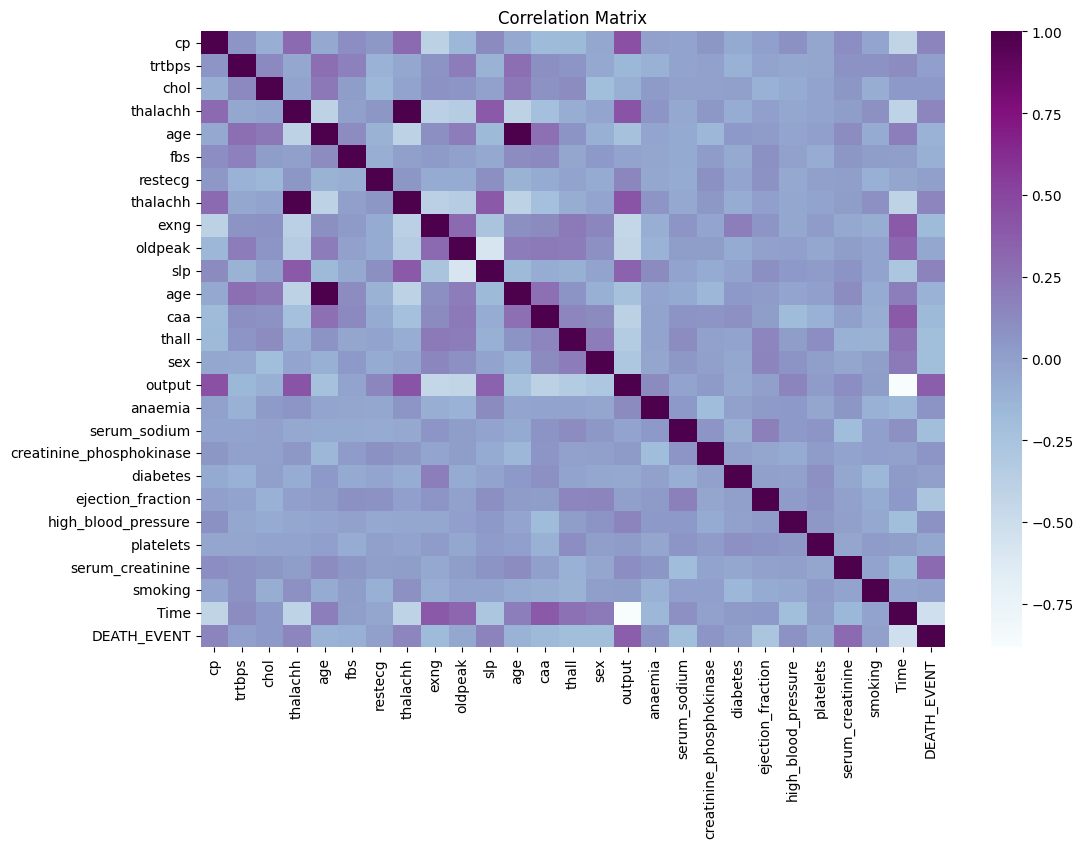

In [221]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='BuPu', fmt='.2f')
#sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns, annot=True,ax=ax)# plot the heatmap
plt.title('Correlation Matrix')
plt.show()

## Feature Distribution

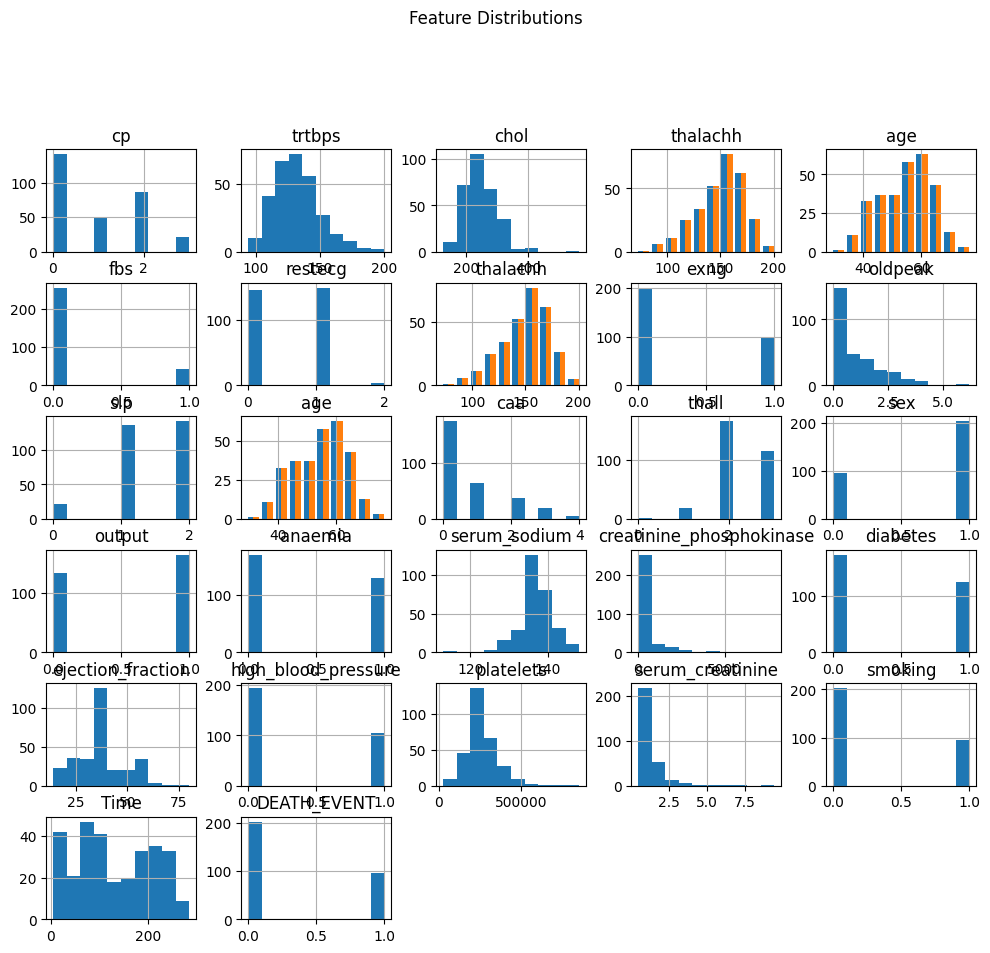

In [222]:
df.hist(figsize=(12, 10))
plt.suptitle('Feature Distributions', x=0.5, y=1.02, ha='center',fontsize='large')
plt.show()

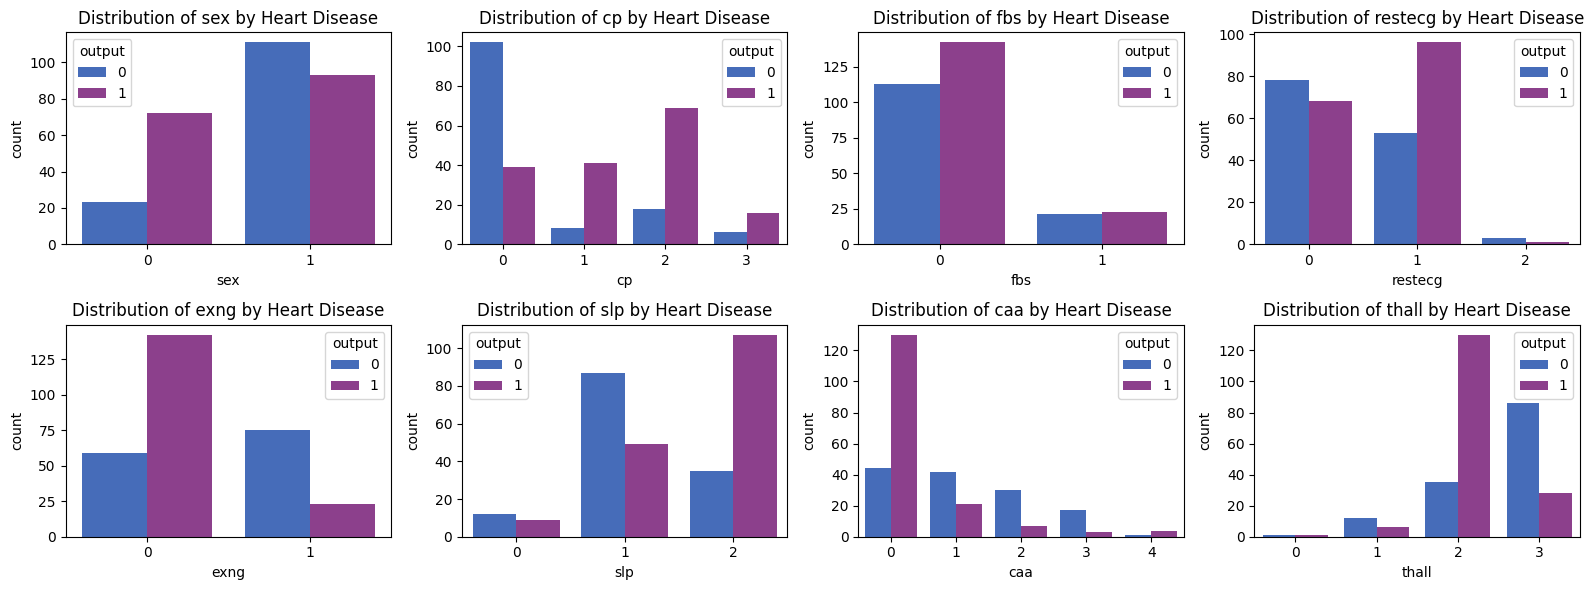

In [223]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
num_rows = 2
num_cols = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 6))

for i, feature in enumerate(categorical_features):
    row_index = i // num_cols
    col_index = i % num_cols

    sns.countplot(x=feature, hue='output', data=df, palette=['#3366cc', '#993399'], ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'Distribution of {feature} by Heart Disease')

plt.tight_layout()
plt.show()

## Age Distribution

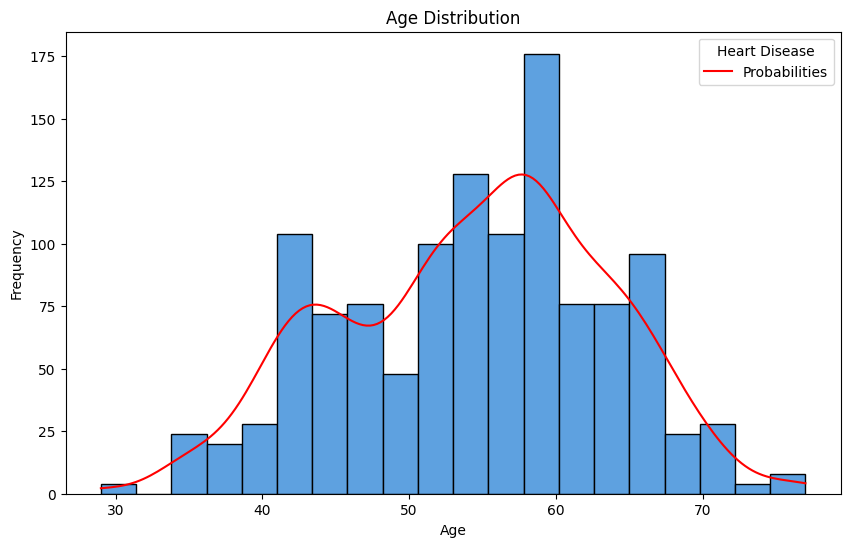

In [224]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=20, kde=True, multiple='stack', facecolor='#5EA1E0').lines[0].set_color('red')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Heart Disease', labels=['Probabilities'])
plt.show()



## Noise identification¶

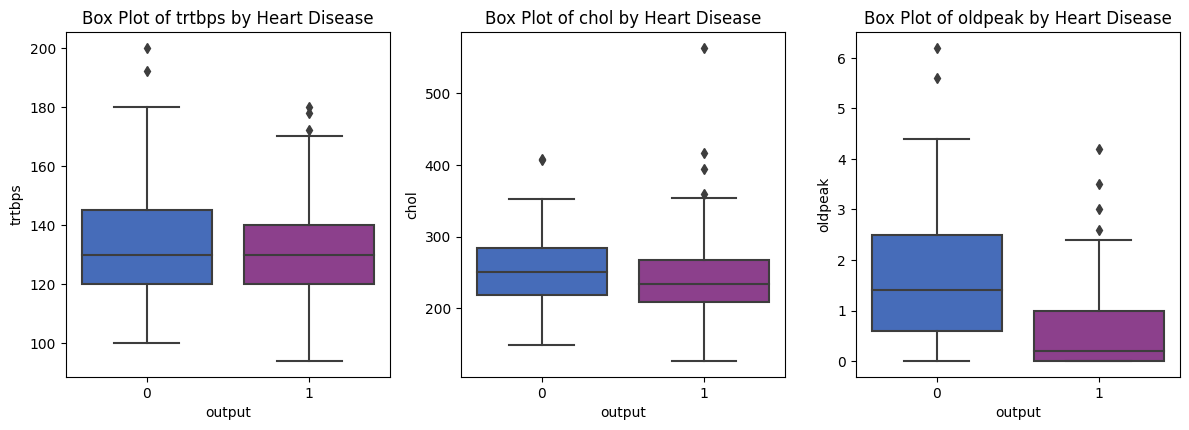

In [225]:
numerical_features = ['trtbps', 'chol', 'oldpeak']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='output', y=feature, data=df, palette=['#3366cc', '#993399'])
    plt.title(f'Box Plot of {feature} by Heart Disease')

plt.tight_layout()
plt.show()

### Remove value where cholestrol is over 500

In [226]:
df = df[df['chol'] <= 500]

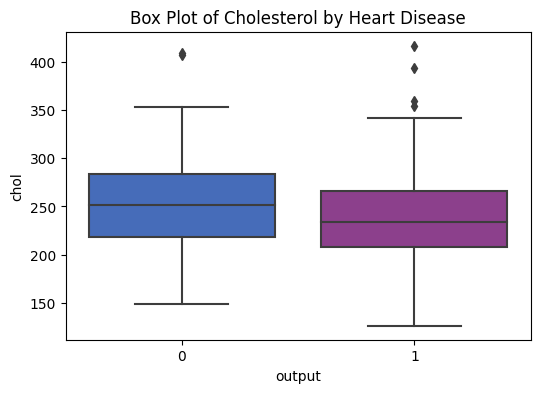

In [227]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.boxplot(x='output', y='chol', data=df, palette=['#3366cc', '#993399'])
plt.title('Box Plot of Cholesterol by Heart Disease')
plt.show()

In [231]:
X = df.drop('output', axis=1)
y = df['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## MODELS

## Logistic Regression

Logistic Regression Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        37

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



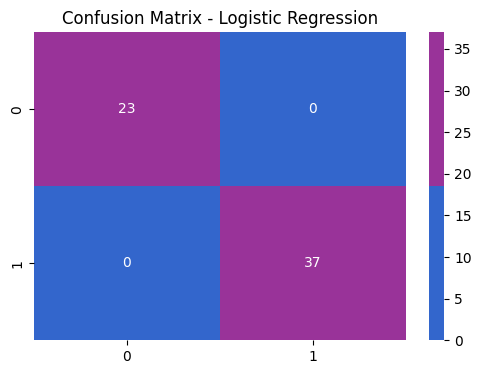

In [232]:
model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)

y_pred = model_lr.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap=sns.color_palette(['#3366cc', '#993399']))
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

## Random Forest

Random Forest Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        37

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



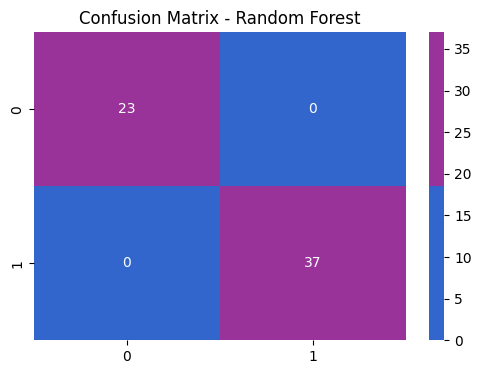

In [233]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_scaled, y_train)

y_pred_rf = model_rf.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred_rf))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap=sns.color_palette(['#3366cc', '#993399']))
plt.title('Confusion Matrix - Random Forest')
plt.show()

## Support Vector Machine

SVM Accuracy: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        23
           1       0.97      1.00      0.99        37

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



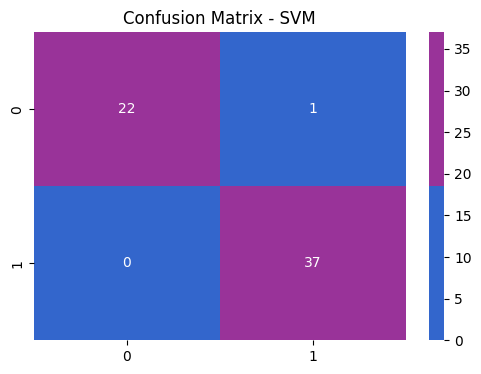

In [234]:
model_svm = SVC(kernel='linear', random_state=42)
model_svm.fit(X_train_scaled, y_train)
y_pred_svm = model_svm.predict(X_test_scaled)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred_svm))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap=sns.color_palette(['#3366cc', '#993399']))
plt.title('Confusion Matrix - SVM')
plt.show()

## KNN

KNN Accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.74      0.79        23
           1       0.85      0.92      0.88        37

    accuracy                           0.85        60
   macro avg       0.85      0.83      0.84        60
weighted avg       0.85      0.85      0.85        60



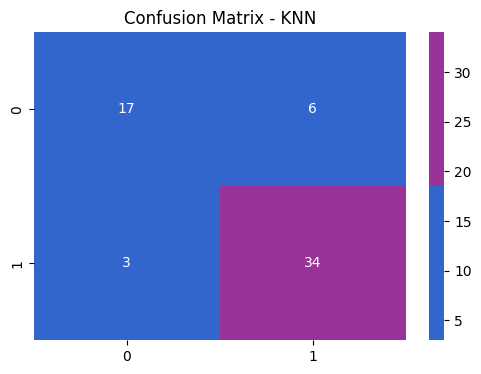

In [235]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_scaled, y_train)

y_pred_knn = model_knn.predict(X_test_scaled)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred_knn))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap=sns.color_palette(['#3366cc', '#993399']))
plt.title('Confusion Matrix - KNN')
plt.show()

## Naive Bayes

Naive Bayes Accuracy: 0.98
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        23
           1       1.00      0.97      0.99        37

    accuracy                           0.98        60
   macro avg       0.98      0.99      0.98        60
weighted avg       0.98      0.98      0.98        60



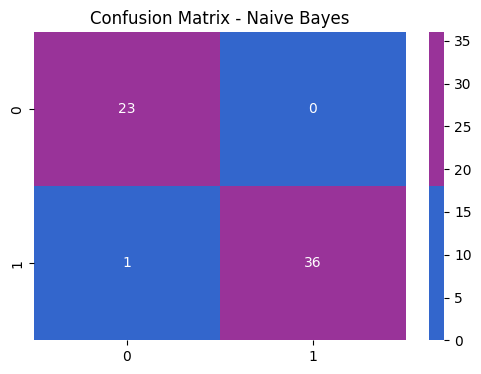

In [236]:
model_nb = GaussianNB()
model_nb.fit(X_train_scaled, y_train)

y_pred_nb = model_nb.predict(X_test_scaled)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Naive Bayes Accuracy: {accuracy_nb:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred_nb))


plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap=sns.color_palette(['#3366cc', '#993399']))
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

## Ada Boost Classifier

AdaBoost Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        37

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



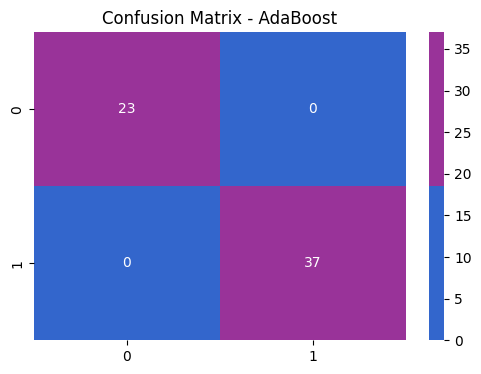

In [237]:
model_adaboost = AdaBoostClassifier(random_state=42)
model_adaboost.fit(X_train_scaled, y_train)


y_pred_adaboost = model_adaboost.predict(X_test_scaled)


accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print(f'AdaBoost Accuracy: {accuracy_adaboost:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred_adaboost))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_adaboost), annot=True, fmt='d', cmap=sns.color_palette(['#3366cc', '#993399']))
plt.title('Confusion Matrix - AdaBoost')
plt.show()

## XGBOOST

XGBoost Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        37

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



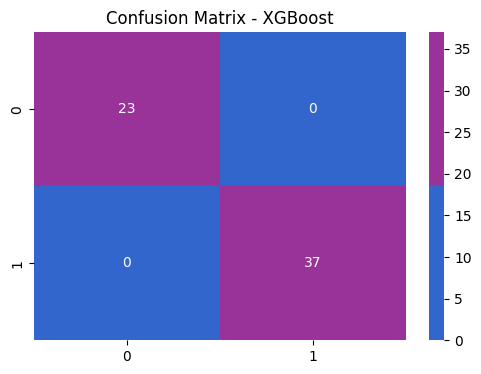

In [238]:
model_xgb = XGBClassifier(random_state=42)
model_xgb.fit(X_train_scaled, y_train)

y_pred_xgb = model_xgb.predict(X_test_scaled)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f'XGBoost Accuracy: {accuracy_xgb:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred_xgb))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap=sns.color_palette(['#3366cc', '#993399']))
plt.title('Confusion Matrix - XGBoost')
plt.show()

## Neural Network

Neural Network Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        37

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



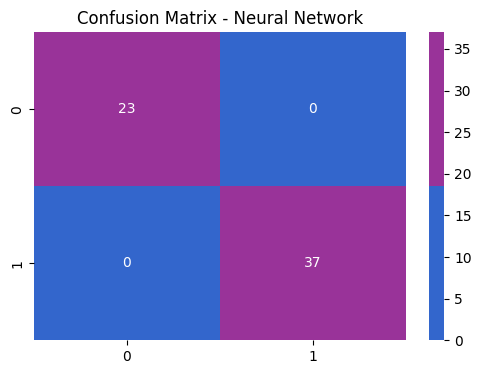

In [239]:
model_nn = MLPClassifier(random_state=42, max_iter=500)
model_nn.fit(X_train_scaled, y_train)

y_pred_nn = model_nn.predict(X_test_scaled)

accuracy_nn = accuracy_score(y_test, y_pred_nn)
print(f'Neural Network Accuracy: {accuracy_nn:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred_nn))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_nn), annot=True, fmt='d', cmap=sns.color_palette(['#3366cc', '#993399']))
plt.title('Confusion Matrix - Neural Network')
plt.show()

## Models Summary

In [240]:
models = ['XGBoost', 'Neural Network', 'AdaBoost', 'Naive Bayes', 'KNN', 'SVM', 'Random Forest', 'Logistic Regression']
accuracies = [accuracy_xgb, accuracy_nn, accuracy_adaboost, accuracy_nb, accuracy_knn, accuracy_svm, accuracy_rf, accuracy]

table = PrettyTable()
table.field_names = ["Model", "Accuracy"]

color_codes = {
    'XGBoost': '\033[91m',  # Red
    'Neural Network': '\033[93m',  # Yellow
    'AdaBoost': '\033[92m',  # Green
    'Naive Bayes': '\033[94m',  # Blue
    'KNN': '\033[33m',  # Orange
    'SVM': '\033[95m',  # Purple
    'Random Forest': '\033[30m',  # Black
    'Logistic Regression': '\033[95m'  # Pink
}

for model, accuracy in zip(models, accuracies):

    colored_model = f'{color_codes[model]}{model}\033[0m'
    colored_accuracy = f'{color_codes[model]}{accuracy:.2%}\033[0m'
    table.add_row([colored_model, colored_accuracy])

print(table)

+---------------------+----------+
|        Model        | Accuracy |
+---------------------+----------+
|       XGBoost       | 100.00%  |
|    Neural Network   | 100.00%  |
|       AdaBoost      | 100.00%  |
|     Naive Bayes     |  98.33%  |
|         KNN         |  85.00%  |
|         SVM         |  98.33%  |
|    Random Forest    | 100.00%  |
| Logistic Regression | 100.00%  |
+---------------------+----------+


## Conclusion

Based on the above mentioned table the accuracy scores of various machine learning models applied to a heart attack prediction task. Here's a summary and interpretation of the results:

**XGBoost, Neural Network, AdaBoost, Random Forest, and Logistic Regression:** These models have achieved a perfect accuracy score of 100.00%. While at first glance, this might seem ideal, in practical scenarios, such a high accuracy, especially a perfect score, could be indicative of overfitting. Overfitting happens when a model learns the training data too well, including its noise and outliers, making it perform exceptionally on the training data but potentially poorly on unseen data. It's crucial to validate these results using a separate test dataset or through cross-validation techniques to ensure the model generalizes well to new, unseen data.

**Naive Bayes and SVM (Support Vector Machine):** Both of these models show a high accuracy of 98.33%. While not perfect, these scores are still exceptionally high and suggest that the models are very effective at predicting heart attacks based on the given data. The slightly lower accuracy, compared to the models with 100% accuracy, might actually be more realistic, indicating good fit without overfitting. However, the same caution applies: it's essential to validate these models on unseen data to ensure their generalizability.

**KNN (K-Nearest Neighbors):** This model has the lowest accuracy among the listed models at 85.00%. While still relatively high, this suggests that KNN, with its default parameters or the specific way it was applied here, is less effective at capturing the complexities of the data compared to the other models. KNN's performance can vary significantly with the choice of 'k' (the number of nearest neighbors considered) and the distance metric used, so adjusting these parameters might improve its performance.